<a href="https://colab.research.google.com/github/oyjuffer/DL-Final/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
from google.colab import drive
drive.mount('/content/drive')

# dataset directory.
data_dir= "/content/drive/MyDrive/FER-2013/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data_dir= "emotion-detection-fer/"

In [19]:
image_size = 48
batch_size = 60

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "train/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='grayscale')

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "test/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='grayscale')

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [20]:
class_names = val_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


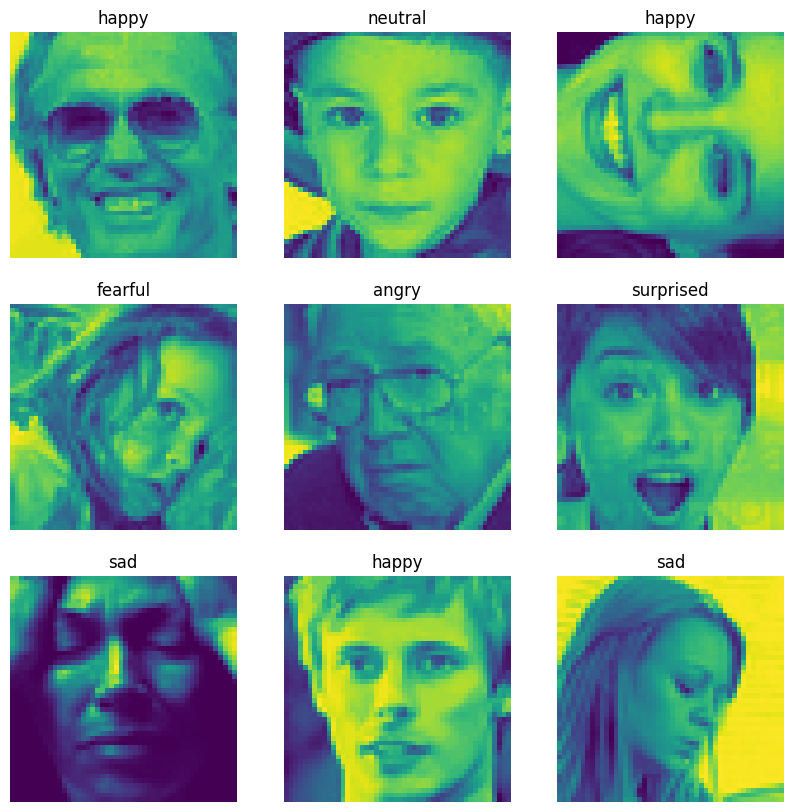

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_size, image_size, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
base_learning_rate = 0.0001

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [24]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
479/479 [==============================] - 21s 42ms/step - loss: 1.7917 - accuracy: 0.2619 - val_loss: 1.7276 - val_accuracy: 0.3362
Epoch 2/10
479/479 [==============================] - 21s 44ms/step - loss: 1.6562 - accuracy: 0.3567 - val_loss: 1.6298 - val_accuracy: 0.3768
Epoch 3/10
479/479 [==============================] - 22s 47ms/step - loss: 1.5808 - accuracy: 0.3982 - val_loss: 1.5727 - val_accuracy: 0.4081
Epoch 4/10
479/479 [==============================] - 22s 45ms/step - loss: 1.5379 - accuracy: 0.4158 - val_loss: 1.5160 - val_accuracy: 0.4253
Epoch 5/10
479/479 [==============================] - 22s 47ms/step - loss: 1.4998 - accuracy: 0.4298 - val_loss: 1.4898 - val_accuracy: 0.4296
Epoch 6/10
479/479 [==============================] - 22s 46ms/step - loss: 1.4701 - accuracy: 0.4456 - val_loss: 1.4622 - val_accuracy: 0.4451
Epoch 7/10
479/479 [==============================] - 23s 49ms/step - loss: 1.4404 - accuracy: 0.4561 - val_loss: 1.4559 - val_accuracy:

## Learning curves

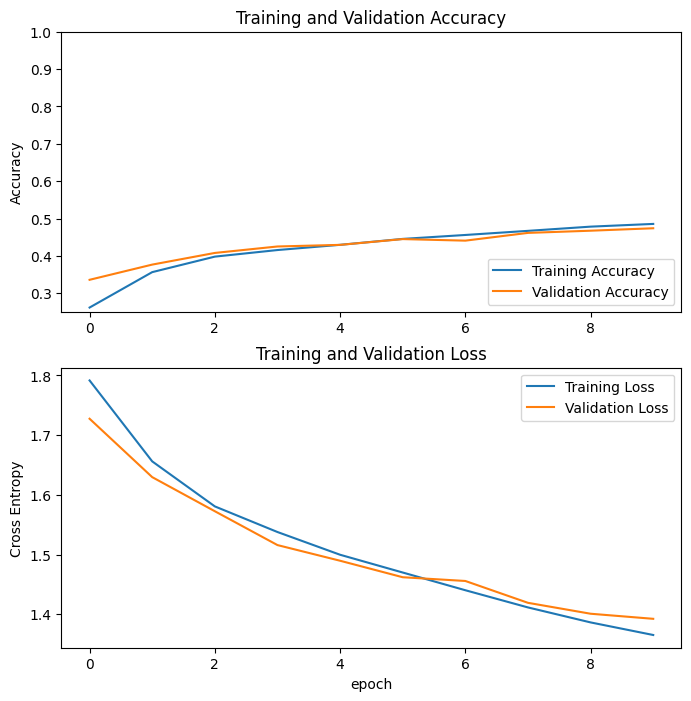

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()